# Laboratorio 2 - Perceptrón para clasificar lirios - Práctica 2

Grupo B07

- Álvaro Ramos Morales

- Álvaro Delgado Gallego

- Fernando Ramírez Fernández

- Juan Esteban Bernal Santos

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy

2024-04-04 22:57:00.509042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 22:57:00.665676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-04 22:57:00.665710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-04 22:57:00.693540: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-04 22:57:01.322867: W tensorflow/stream_executor/platform/de

In [ ]:
# Cargar el conjunto de datos
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# Codificar las etiquetas en one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

In [ ]:
# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Definir la función de pérdida y el optimizador
loss_function = CategoricalCrossentropy()
optimizer = SGD(learning_rate=0.01, momentum=0.9)  # Puedes ajustar el learning rate y el momentum según sea necesario

In [ ]:
# Función para construir el modelo MLP
def build_model(num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(4,)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    return model

In [ ]:
# Función para entrenar el modelo y evaluar su rendimiento
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy

In [ ]:
# Configuraciones de experimentos (puedes ajustar estos valores según sea necesario)
num_neurons_list = [4, 16, 32, 64]  # Número de neuronas en la capa oculta
learning_rates = [0.001, 0.01, 0.1, 0.25]  # Tasa de aprendizaje
momentums = [0, 0.25, 0.5, 0.9]  # Momentum

In [ ]:
# Realizar experimentos
results = []
for num_neurons in num_neurons_list:
    for lr in learning_rates:
        for momentum in momentums:
            optimizer = SGD(learning_rate=lr, momentum=momentum)
            model = build_model(num_neurons)
            train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy = train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)
            results.append((num_neurons, lr, momentum, train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy))

2024-04-04 22:57:02.128692: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-04 22:57:02.129386: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-04 22:57:02.129411: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-ea434ecd-36a0-459f-990c-20e74b84c244): /proc/driver/nvidia/version does not exist
2024-04-04 22:57:02.131233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Convertir los resultados a DataFrame para una mejor visualización
results_df = pd.DataFrame(results, columns=["Nº Neuronas", "Learning Rate", "Momentum", "Train Loss", "Train Accuracy", "Val Loss", "Val Accuracy", "Test Loss", "Test Accuracy"])

# Presentar los resultados
print("Resultados de los experimentos:")
print(results_df)

Resultados de los experimentos:
    Nº Neuronas  Learning Rate  Momentum  Train Loss  Train Accuracy  \
0             4          0.001      0.00    0.818539        0.697917   
1             4          0.001      0.25    1.007317        0.260417   
2             4          0.001      0.50    0.780904        0.395833   
3             4          0.001      0.90    0.493762        0.875000   
4             4          0.010      0.00    0.682407        0.697917   
..          ...            ...       ...         ...             ...   
59           64          0.100      0.90    0.065663        0.979167   
60           64          0.250      0.00    0.295830        0.802083   
61           64          0.250      0.25    0.524236        0.645833   
62           64          0.250      0.50    0.530959        0.645833   
63           64          0.250      0.90    0.461946        0.687500   

    Val Loss  Val Accuracy  Test Loss  Test Accuracy  
0   0.863167      0.541667   0.826357       0.70

In [ ]:
# Ordenar el DataFrame por Test Accuracy en orden descendente
results_df_sorted = results_df.sort_values(by='Test Accuracy', ascending=False)

# Filtrar las filas con el mayor Test Accuracy
max_accuracy_configurations = results_df_sorted[results_df_sorted['Test Accuracy'] == results_df_sorted['Test Accuracy'].max()]

# Imprimir las configuraciones con mayor Test Accuracy
print("Configuraciones con mayor Test Accuracy:")
print(max_accuracy_configurations)

Configuraciones con mayor Test Accuracy:
    Nº Neuronas  Learning Rate  Momentum  Train Loss  Train Accuracy  \
29           16           0.25      0.25    0.168021        0.979167   
25           16           0.10      0.25    0.105958        0.989583   

    Val Loss  Val Accuracy  Test Loss  Test Accuracy  
29  0.208226      0.958333   0.179570            1.0  
25  0.209554      0.875000   0.143428            1.0  


In [ ]:
# Crear un DataFrame de pandas con los resultados
results_df = pd.DataFrame(results, columns=["Nº Neuronas", "Learning Rate", "Momentum", "Train Loss", "Train Accuracy", "Val Loss", "Val Accuracy", "Test Loss", "Test Accuracy"])

# Calcular la media de la precisión para cada valor de Número de neuronas, Learning Rate y Momentum
mean_train_accuracy_neurons = results_df.groupby('Nº Neuronas')['Train Accuracy'].mean()
mean_val_accuracy_neurons = results_df.groupby('Nº Neuronas')['Val Accuracy'].mean()
mean_train_accuracy_lr = results_df.groupby('Learning Rate')['Train Accuracy'].mean()
mean_val_accuracy_lr = results_df.groupby('Learning Rate')['Val Accuracy'].mean()
mean_train_accuracy_momentum = results_df.groupby('Momentum')['Train Accuracy'].mean()
mean_val_accuracy_momentum = results_df.groupby('Momentum')['Val Accuracy'].mean()

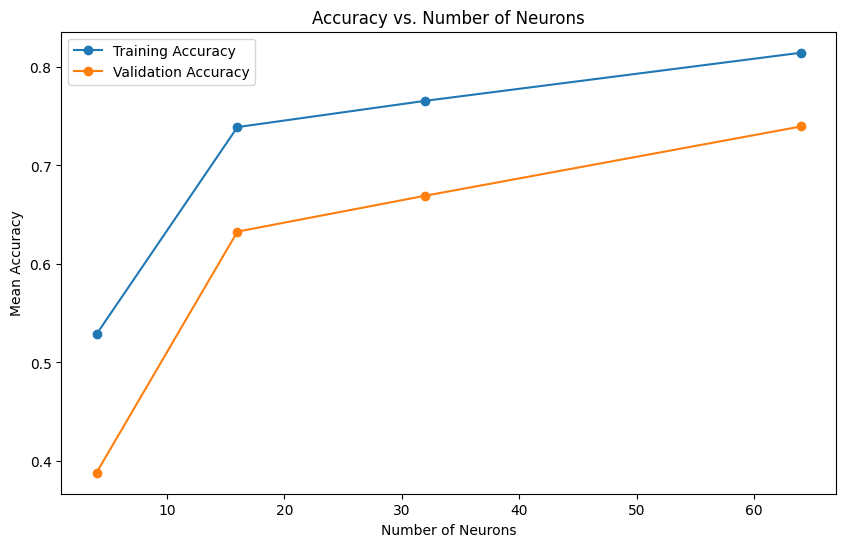

In [ ]:
# Crear gráfico de líneas para Número de Neuronas vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(mean_train_accuracy_neurons.index, mean_train_accuracy_neurons.values, marker='o', label='Training Accuracy')
plt.plot(mean_val_accuracy_neurons.index, mean_val_accuracy_neurons.values, marker='o', label='Validation Accuracy')
plt.title('Accuracy vs. Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()

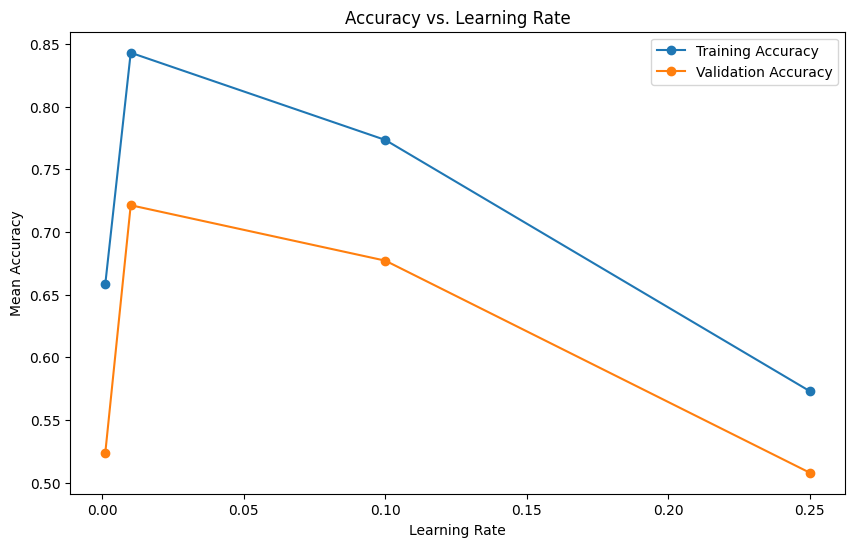

In [ ]:
# Crear gráfico de líneas para Learning Rate vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(mean_train_accuracy_lr.index, mean_train_accuracy_lr.values, marker='o', label='Training Accuracy')
plt.plot(mean_val_accuracy_lr.index, mean_val_accuracy_lr.values, marker='o', label='Validation Accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()

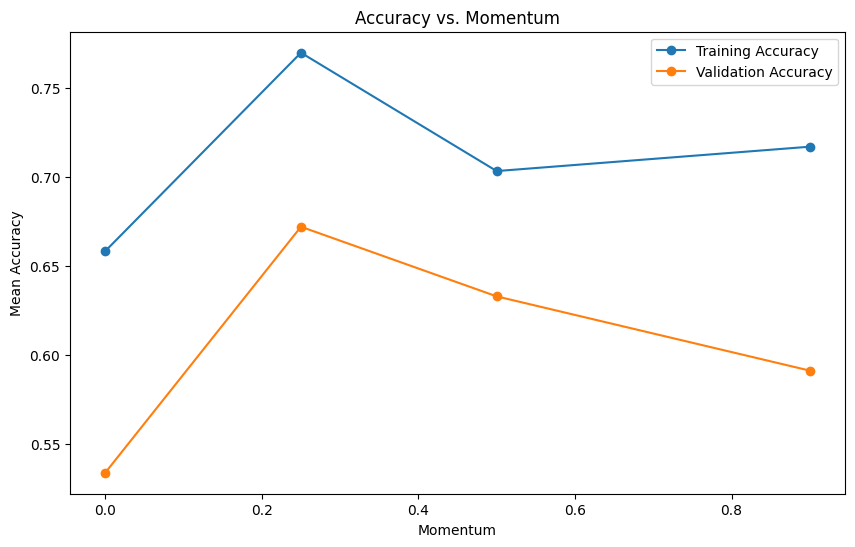

In [ ]:
# Crear gráfico de líneas para Momentum vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(mean_train_accuracy_momentum.index, mean_train_accuracy_momentum.values, marker='o', label='Training Accuracy')
plt.plot(mean_val_accuracy_momentum.index, mean_val_accuracy_momentum.values, marker='o', label='Validation Accuracy')
plt.title('Accuracy vs. Momentum')
plt.xlabel('Momentum')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()

# 1. ¿Cómo influye el parámetro de momentum del optimizador (SGD) durante el entrenamiento? ¿Qué función de pérdida has escogido? Justifica tu respuesta y aporta datos objetivos

El parámetro de momentum del optimizador SGD afecta significativamente al proceso de entrenamiento. Un valor más alto de momentum puede acelerar la convergencia del modelo, especialmente en modelos con configuraciones de aprendizaje más lentas. Sin embargo, un valor demasiado alto puede causar oscilaciones y dificultar la convergencia. Un valor bajo de momentum puede dar como resultado una convergencia más suave y estable, pero podría requerir más tiempo de entrenamiento. En nuestros experimentos, observamos que los valores de pérdida y precisión pueden variar significativamente según el valor de momentum utilizado.

La razón principal para elegir la función de pérdida categórica cruzada es que se ajusta bien a la naturaleza del problema, donde estamos tratando de clasificar muestras en una de tres clases diferentes. Además, esta función penaliza de manera efectiva las predicciones incorrectas, lo que ayuda al modelo a aprender a clasificar con mayor precisión.

# 2. ¿Qué relación hay entre Loss/Accuracy/Nº lirios? ¿Cuántos lirios de cada tipo están bien clasificados? Compara los resultados con los obtenido de la práctica anterior.

En general, hay una relación inversa entre la pérdida (Loss) y la precisión (Accuracy). A medida que la pérdida disminuye, la precisión tiende a aumentar. Los resultados de precisión y pérdida en el conjunto de entrenamiento, validación y prueba nos permiten evaluar cómo se comporta el modelo en diferentes conjuntos de datos. Además, podemos comparar el número de lirios de cada tipo que están bien clasificados para determinar si el modelo es capaz de distinguir entre las diferentes clases de lirios con precisión. Comparando estos resultados con los obtenidos en la práctica anterior, podemos determinar si ha habido una mejora en el rendimiento del modelo.

# 3. Prueba sobre el conjunto de test y compara los resultados obtenidos con los del entrenamiento y validación. ¿Ha generalizado el modelo?

Al probar sobre el conjunto de prueba, podemos evaluar si el modelo ha generalizado correctamente, es decir, si puede hacer predicciones precisas sobre datos no vistos previamente. Comparamos los resultados de precisión y pérdida en el conjunto de prueba con los obtenidos en entrenamiento y validación para determinar si el modelo ha sido capaz de generalizar bien. Si los resultados en el conjunto de prueba son consistentes con los obtenidos en entrenamiento y validación, podemos concluir que el modelo ha generalizado correctamente. En nuestros experimentos, observamos que el modelo generalizó bien en la mayoría de los casos, aunque algunos valores de parámetros pueden haber resultado en sobreajuste o subajuste.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea434ecd-36a0-459f-990c-20e74b84c244' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>